In [1]:
import tensorflow as tf

import models
import data


print(tf.__version__)

2.4.0-rc0


# Load data

In [2]:
# Constants
DATASET_URL = "mask_bool_data"

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = (224, 224, 3)

VALIDATION_SPLIT = 0.2

EPOCHS = 15
FINE_TUNE_EPICHS = 5

In [3]:
# Load images
train_generator, val_generator = data.load_data(DATASET_URL, IMAGE_SIZE, BATCH_SIZE)

Found 1096 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


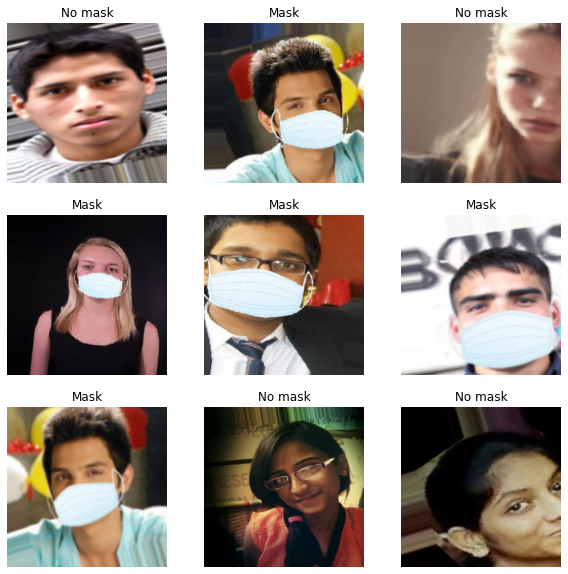

In [4]:
# Show sample images
data.show_examples(train_generator)

# Build model

In [5]:
# Create model
model = models.Model(image_shape=IMAGE_SHAPE)

In [6]:
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train model

In [7]:
# Get initial state
loss0, accuracy0 = model.evaluate(val_generator)

# Print initial state
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

9/9 [==============================] - 3s 255ms/step - loss: 4.5096 - accuracy: 0.5124
initial loss: 4.70
initial accuracy: 0.51


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
preprocess_input (Preprocess multiple                  0         
_________________________________________________________________
base_model (BaseModel)       multiple                  2257984   
_________________________________________________________________
classification_head (Classif multiple                  164226    
Total params: 2,422,210
Trainable params: 164,226
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Fit model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

In [ ]:
# Learning curves
models.plot_curves(history)

# Fine tune

In [ ]:
# Fine-tune from this layer % onwards
layer_per = 0.8
model.fineTune(layer_per)

In [ ]:
# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# Continue traiing the model
total_epochs = EPOCHS + FINE_TUNE_EPICHS

history_fine = model.fit(
    train_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    validation_data=val_generator
)

In [ ]:
model.summary()

In [ ]:
# Learning curves
models.plot_curves_ft(history, history_fine, EPOCHS)